## Load data

In [1]:
!pwd

/notebooks


In [2]:
!git clone https://github.com/sunh0003/W251_FinalProject.git

fatal: destination path 'W251_FinalProject' already exists and is not an empty directory.


In [3]:
%mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
%cd W251_FinalProject

/notebooks/W251_FinalProject


In [5]:
%cd Kaggle

/notebooks/W251_FinalProject/Kaggle


In [6]:
%mkdir /notebooks/data/train

mkdir: cannot create directory ‘/notebooks/data/train’: File exists


In [7]:
from shutil import unpack_archive
unpack_archive('train1.zip', '/notebooks')
unpack_archive('train2.zip', '/notebooks')
unpack_archive('train3.zip', '/notebooks')
unpack_archive('validation.zip', '/notebooks')

In [8]:
%mv /notebooks/train1/fear /notebooks/data/train
%mv /notebooks/train1/happy /notebooks/data/train
%mv /notebooks/train2/netural /notebooks/data/train
%mv /notebooks/train2/sad /notebooks/data/train
%mv /notebooks/train2/suprise /notebooks/data/train
%mv /notebooks/train3/angry /notebooks/data/train
%mv /notebooks/train3/disgust /notebooks/data/train
%mv /notebooks/validation /notebooks/data

mv: cannot move '/notebooks/train1/fear' to '/notebooks/data/train/fear': Directory not empty
mv: cannot move '/notebooks/train1/happy' to '/notebooks/data/train/happy': Directory not empty
mv: cannot stat '/notebooks/train2/netural': No such file or directory
mv: cannot move '/notebooks/train2/sad' to '/notebooks/data/train/sad': Directory not empty
mv: cannot stat '/notebooks/train2/suprise': No such file or directory
mv: cannot move '/notebooks/train3/angry' to '/notebooks/data/train/angry': Directory not empty
mv: cannot move '/notebooks/train3/disgust' to '/notebooks/data/train/disgust': Directory not empty
mv: cannot move '/notebooks/validation' to '/notebooks/data/validation': Directory not empty


In [1]:
!pwd

/notebooks


## Model

In [10]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (20.1.1)


In [11]:
!pip3 install pillow

In [69]:
! rmdir /notebooks/data/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data/validation/.ipynb_checkpoints': No such file or directory


# run littleVGG

In [2]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

Using TensorFlow backend.


In [3]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = '/notebooks/data7cls/train'
validation_data_dir = '/notebooks/data7cls/validation'

In [4]:
# Let's use some data augmentaiton 
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 25453 images belonging to 7 classes.
Found 6229 images belonging to 7 classes.


In [5]:
print(validation_generator.class_indices)

{'confused': 1, 'neutral': 4, 'angry': 0, 'surprise': 6, 'sad': 5, 'distracted': 2, 'happy': 3}


In [6]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(7, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(BatchNormalization())

model.add(Conv2D(7, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_

In [7]:
%mkdir littleVGG7cls

In [8]:
%%time
filepath = os.path.join("/notebooks/littleVGG7cls/model_littleVGG_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
callbacks = [checkpoint]
# if mode == "train":
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
# Found 25453 images belonging to 7 classes.
# Found 6229 images belonging to 7 classes.

nb_train_samples = 25453
nb_validation_samples = 6229
epochs = 150
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
49/49 [==============================] - 113s 2s/step - loss: 1.9390 - acc: 0.1911 - val_loss: 1.8780 - val_acc: 0.2826

Epoch 00001: val_acc improved from -inf to 0.28255, saving model to /notebooks/littleVGG7cls/model_littleVGG_1.hdf5
Epoch 2/150
49/49 [==============================] - 109s 2s/step - loss: 1.8867 - acc: 0.2787 - val_loss: 1.8668 - val_acc: 0.2926

Epoch 00002: val_acc improved from 0.28255 to 0.29264, saving model to /notebooks/littleVGG7cls/model_littleVGG_2.hdf5
Epoch 3/150
49/49 [==============================] - 109s 2s/step - loss: 1.8757 - acc: 0.2842 - val_loss: 1.8569 - val_acc: 0.2974

Epoch 00003: val_acc improved from 0.29264 to 0.29736, saving model to /notebooks/littleVGG7cls/model_littleVGG_3.hdf5
Epoch 4/150
49/49 [==============================] - 109s 2s/step - loss: 1.8544 - acc: 0.2811 - val_loss: 1.8298 - val_acc: 0.2939

Epoch 00004: val_acc did not improve from 0.29736
Epoch 5/150
49/4

49/49 [==============================] - 110s 2s/step - loss: 1.6338 - acc: 0.3961 - val_loss: 1.5547 - val_acc: 0.4371

Epoch 00049: val_acc did not improve from 0.44674
Epoch 50/150
49/49 [==============================] - 110s 2s/step - loss: 1.6299 - acc: 0.3993 - val_loss: 1.5399 - val_acc: 0.4418

Epoch 00050: val_acc did not improve from 0.44674
Epoch 51/150
49/49 [==============================] - 110s 2s/step - loss: 1.6264 - acc: 0.4009 - val_loss: 1.5289 - val_acc: 0.4515

Epoch 00051: val_acc improved from 0.44674 to 0.45146, saving model to /notebooks/littleVGG7cls/model_littleVGG_51.hdf5
Epoch 52/150
49/49 [==============================] - 110s 2s/step - loss: 1.6254 - acc: 0.4053 - val_loss: 1.5324 - val_acc: 0.4471

Epoch 00052: val_acc did not improve from 0.45146
Epoch 53/150
49/49 [==============================] - 110s 2s/step - loss: 1.6178 - acc: 0.4076 - val_loss: 1.5270 - val_acc: 0.4512

Epoch 00053: val_acc did not improve from 0.45146
Epoch 54/150
49/49 [===

49/49 [==============================] - 183s 4s/step - loss: 1.3347 - acc: 0.4842 - val_loss: 1.2221 - val_acc: 0.5356

Epoch 00135: val_acc did not improve from 0.53564
Epoch 136/150
49/49 [==============================] - 183s 4s/step - loss: 1.3331 - acc: 0.4880 - val_loss: 1.2214 - val_acc: 0.5335

Epoch 00136: val_acc did not improve from 0.53564
Epoch 137/150
49/49 [==============================] - 190s 4s/step - loss: 1.3394 - acc: 0.4802 - val_loss: 1.2116 - val_acc: 0.5464

Epoch 00137: val_acc improved from 0.53564 to 0.54644, saving model to /notebooks/littleVGG7cls/model_littleVGG_137.hdf5
Epoch 138/150
49/49 [==============================] - 179s 4s/step - loss: 1.3310 - acc: 0.4858 - val_loss: 1.2250 - val_acc: 0.5275

Epoch 00138: val_acc did not improve from 0.54644
Epoch 139/150
49/49 [==============================] - 181s 4s/step - loss: 1.3348 - acc: 0.4817 - val_loss: 1.2058 - val_acc: 0.5436

Epoch 00139: val_acc did not improve from 0.54644
Epoch 140/150
49/4

## Analyze the result

In [14]:
print(model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


<Figure size 640x480 with 1 Axes>

## Confusion Matrix

In [11]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# nb_train_samples = 25453
# nb_validation_samples = 6229

nb_train_samples = 25453
nb_validation_samples = 6229

# We need to recreate our validation generator with shuffle = false
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

Found 6229 images belonging to 7 classes.
Confusion Matrix
[[ 271    1    0  144  301  145   98]
 [   5  139    0    0    6    9    3]
 [   0   41    0    7   23   29   30]
 [ 131    1    0 1311  202  101   79]
 [ 114    0    0  169  713  141   79]
 [ 162    0    0  153  379  364   81]
 [  39    0    0   73   82   40  563]]
Classification Report
              precision    recall  f1-score   support

       angry       0.38      0.28      0.32       960
    confused       0.76      0.86      0.81       162
  distracted       0.00      0.00      0.00       130
       happy       0.71      0.72      0.71      1825
     neutral       0.42      0.59      0.49      1216
         sad       0.44      0.32      0.37      1139
    surprise       0.60      0.71      0.65       797

    accuracy                           0.54      6229
   macro avg       0.47      0.50      0.48      6229
weighted avg       0.52      0.54      0.53      6229



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)#[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

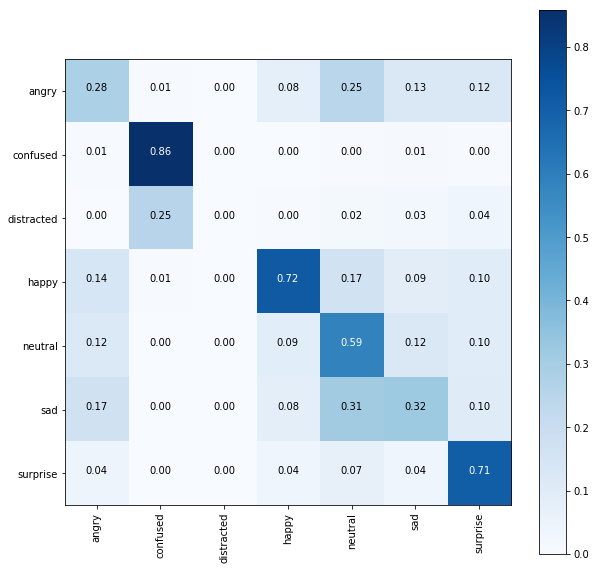

In [12]:
import itertools
cm=cnf_matrix
cm = cm.astype('float') / cm.sum(axis=1)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

In [ ]:
# option 2: setup transfer learning code, using 9 classes wts for 7 classes - Michelle

## Model 2 : littleVGG

In [15]:
!pwd

/notebooks


In [16]:
%cp -r /notebooks/data7cls_newimg_randomsplit /notebooks/W251_FinalProject

In [19]:
%cd W251_FinalProject

/notebooks/W251_FinalProject


In [20]:
!pwd

/notebooks/W251_FinalProject


In [21]:
!git add .